In [1]:
%load_ext autoreload
%autoreload 2

In [59]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

In [60]:
from classes.photon_class import Photon, Photon_Simulation, create_doms

In [62]:
Nphotons = 1000
dt = 1.0
tInit = 0.0
PA = 0.01
PS = 0.05
pInit = [0.0, 0.0]
dInit = "random" #0.0


xlim = [-40, 40]
ylim = [-40, 40]
dx = 20
dy = 20
r = 2

DOMs = create_doms(xlim, ylim, dx, dy, r)

params = dict(dt=dt, PA=PA, PS=PS, initial_position=pInit, initial_direction=dInit,
              DOM_attributes=DOMs, time=tInit)

sim = Photon_Simulation(Nphotons, **params)

tstart = time.time()
sim.simulate_photons()
tend = time.time()

print "Simulation took %s seconds" %  (tend-tstart)


 950 out of 1000 photons have been simulated Simulation took 2.7975962162 seconds


 95 out of 100 photons have been simulated 


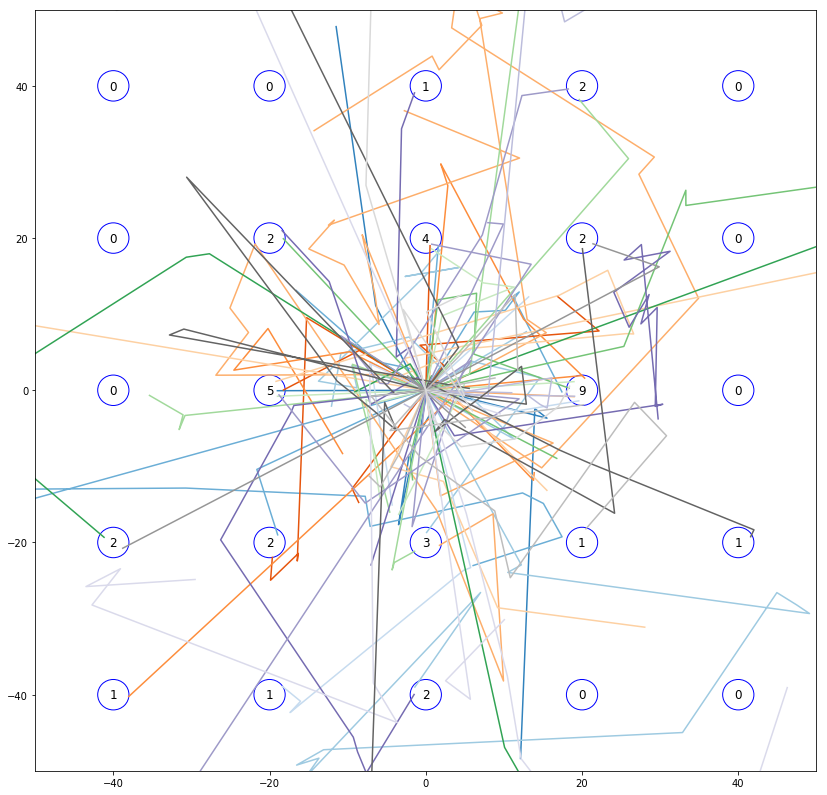

In [57]:
grid = [[-50, 50],
        [-50, 50]]
sim.plot_photons(grid=grid)

In [29]:


def create_doms(xlim, ylim, dx, dy, r):
    xs = np.arange(xlim[0], xlim[1]+0.01, dx)
    ys = np.arange(ylim[0], ylim[1]+0.01, dy)

    DOMs = []
    radii = []
    for x in xs:
        for y in ys:
            if x != 0 or y != 0:
                DOMs.append([x, y])
                radii.append(r)
    return [DOMs, radii]
DOMs, radii = create_doms(xlim, ylim, dx, dy, r)
DOMs, radii

([[-10.0, -10.0],
  [-10.0, 0.0],
  [-10.0, 10.0],
  [0.0, -10.0],
  [0.0, 10.0],
  [10.0, -10.0],
  [10.0, 0.0],
  [10.0, 10.0]],
 [2, 2, 2, 2, 2, 2, 2, 2])